In [1]:
# This script compares performance against the market index. 
# Updated by: Kuo L. 2022-05-02

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Using pands-datareader module to connect to  yahoo finance api 
# to get close price for each ticker stock/ETF.
# for Market Index: NASDAQ Composite (^IXIC), 
#                   S&P 500 (^GSPC), 
#                   Dow Jones Industrial Average (^DJI)
#                   Russell 2000 (^RUT)

market_inx = '^GSPC' # ^GSPC for S&P 500
assets = [market_inx, 'AAPL','AMZN','GOOGL', 'DVN']
start_date = '2020-1-1'
pf_data = pd.DataFrame()

for a in assets:
    #you can chagne the start date to any date in 'yyyy-mm-dd' format.
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = start_date)['Adj Close'] 

In [3]:
pf_data.head() #makre sure companies were public at starting date

,^GSPC,AAPL,AMZN,GOOGL,DVN
Date,,,,,
2020-01-02,3257.850098,73.785904,94.900497,1368.680054,22.118769
2020-01-03,3234.850098,73.068558,93.748497,1361.520020,22.384638
2020-01-06,3246.280029,73.650803,95.143997,1397.810059,22.650507
2020-01-07,3237.179932,73.304413,95.343002,1395.109985,22.719124
2020-01-08,3253.050049,74.483597,94.598503,1405.040039,21.912931


In [4]:
pf_data.tail() #check companies still open and public at ending date

,^GSPC,AAPL,AMZN,GOOGL,DVN
Date,,,,,
2022-06-30,3785.379883,136.720001,106.209999,2179.260010,55.110001
2022-07-01,3825.330078,138.929993,109.559998,2174.750000,55.110001
2022-07-05,3831.389893,141.559998,113.500000,2265.260010,51.889999
2022-07-06,3845.080078,142.919998,114.330002,2291.439941,51.000000
2022-07-07,3902.620117,146.350006,116.330002,2375.659912,53.669998


<AxesSubplot:xlabel='Date'>

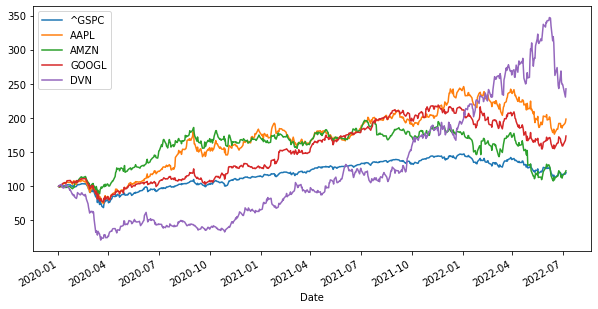

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5)) #Plot of company performance without considering dividends

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1)) #get average daily log returns

In [7]:
log_returns.mean() * 250 #get yearly returns(daily return x # of days a year). Market open roughly 250 days a year, so I do not use 365. 

^GSPC    0.071432
AAPL     0.270899
AMZN     0.080539
GOOGL    0.218128
DVN      0.350644
dtype: float64

In [8]:
log_returns.cov() * 250 #get coveriance between each pair.

,^GSPC,AAPL,AMZN,GOOGL,DVN
^GSPC,0.067091,0.078612,0.061106,0.070731,0.103451
AAPL,0.078612,0.136999,0.091581,0.089869,0.090170
AMZN,0.061106,0.091581,0.139500,0.083020,0.053047
GOOGL,0.070731,0.089869,0.083020,0.111917,0.096906
DVN,0.103451,0.090170,0.053047,0.096906,0.565070


In [9]:
log_returns.corr() #get correlation between each pair.

,^GSPC,AAPL,AMZN,GOOGL,DVN
^GSPC,1.000000,0.819971,0.631633,0.816259,0.531315
AAPL,0.819971,1.000000,0.662457,0.725781,0.324081
AMZN,0.631633,0.662457,1.000000,0.664425,0.188940
GOOGL,0.816259,0.725781,0.664425,1.000000,0.385347
DVN,0.531315,0.324081,0.188940,0.385347,1.000000


***